#### MODELO ARIMA 

Importar las librerias necesarias para la carga de datos y el analisis exploratorio

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Carga de dataset de Eventos Peligrosos que se descargo de la Secretaria General de Riesgos

In [5]:
# Cargar los datos
data = pd.read_excel("C:/Users/wilme/Documents/Maestria/Proyecto Capstone/SGR_EventosPeligrosos_2010_2022Diciembre.xlsx")
data.head()

,ID,PROVINCIA,CODIFICACION PROVINCIAL,CANTON,CODIFICACION CANTONAL,PARROQUIAS,CODIFICACION PARROQUIAL,COMUNIDAD/BARRIO/SECTOR,LATITUD,LONGITUD,...,Ha. DE COBERTURA VEGETAL QUEMADA,ANIMALES AFECTADOS,ANIMALES MUERTOS,DESCRIPCIÓN GENERAL DEL EVENTO,AÑO,NIVEL DEL INF,Macroevento,calificación del evento peligroso,Estado actual de la vía o del INF,Vía Alterna
0,1,Azuay,1,Cuenca,101,Molleturo,10157,"Tanzaray, Chacanseo",-2.717509,-79.397208,...,0.0,0,0,"Crecida de río Patul, produce daños en cultivo...",2010,No aplica,NaN,Nivel 2,NaN,NaN
1,2,Azuay,1,Santa Isabel,108,Santa Isabel (Chaguarurco),10850,Vía Santa Isabel - Pasaje,-3.288058,-79.383685,...,0.0,0,0,"Deslizamiento de tierra, que causo daños a 10 ...",2010,No aplica,NaN,Nivel 1,Habilitada,NaN
2,3,Azuay,1,Sevilla De Oro,113,Amaluza,11351,vía Guarumales - Méndez km15,-2.596527,-78.471749,...,0.0,0,0,Cierre de la vía por dos horas.,2010,No aplica,NaN,Nivel 1,NaN,NaN
3,4,Azuay,1,Cuenca,101,Victoria Del Portete (Irquis),10171,"Altarloma, Sombrederas, Duraznos",-3.071833,-79.154194,...,0.0,0,0,Deslizamiento por explotación de canteras de m...,2010,No aplica,NaN,Nivel 1,Habilitada,NaN
4,5,Azuay,1,Nabon,104,Nabon,10450,Nabón,-3.337235,-79.064110,...,0.0,0,0,Deslizamiento que cubre un área aproximadament...,2010,No aplica,NaN,Nivel 1,Incendio liquidado,NaN


Iniciamos observando cada uno de los campos del dataset con el fin de encontrar anomalias en cuanto a cantidad de registros nulos, esto nos ayudara a eliminar ciertos campos que tengan un gran porcentaje de valores nulos

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56986 entries, 0 to 56985
Data columns (total 56 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   ID                                      56986 non-null  int64         
 1   PROVINCIA                               56986 non-null  object        
 2   CODIFICACION PROVINCIAL                 56986 non-null  int64         
 3   CANTON                                  56986 non-null  object        
 4   CODIFICACION CANTONAL                   56986 non-null  int64         
 5   PARROQUIAS                              56986 non-null  object        
 6   CODIFICACION PARROQUIAL                 56986 non-null  int64         
 7   COMUNIDAD/BARRIO/SECTOR                 56936 non-null  object        
 8   LATITUD                                 56986 non-null  float64       
 9   LONGITUD                                56986 non-

En este caso se van a eliminar del data set los siguientes campos.

In [7]:
data1=data.drop(['COMUNIDAD/BARRIO/SECTOR',
                 'NUMERO DE INFORME PROVINCIAL',
                 'CATEGORÍA DE VÍA', 
                 'DESCRIPCIÓN GENERAL DEL EVENTO',
                 'NIVEL DEL INF','Macroevento',
                 'Estado actual de la vía o del INF','Vía Alterna'], axis=1)

Con el nuevo dataset debemos seguir explorando las variables y dejar el data set lo mas limpio posible.

In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56986 entries, 0 to 56985
Data columns (total 48 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   ID                                      56986 non-null  int64         
 1   PROVINCIA                               56986 non-null  object        
 2   CODIFICACION PROVINCIAL                 56986 non-null  int64         
 3   CANTON                                  56986 non-null  object        
 4   CODIFICACION CANTONAL                   56986 non-null  int64         
 5   PARROQUIAS                              56986 non-null  object        
 6   CODIFICACION PARROQUIAL                 56986 non-null  int64         
 7   LATITUD                                 56986 non-null  float64       
 8   LONGITUD                                56986 non-null  float64       
 9   EVENTO                                  56986 non-

Separamos las variables cuantitativas y cualitativas para un mejor análisis.

In [9]:
var_cuantitativas = data1.select_dtypes('number').columns
var_cualitativas  =data1.select_dtypes('object').columns

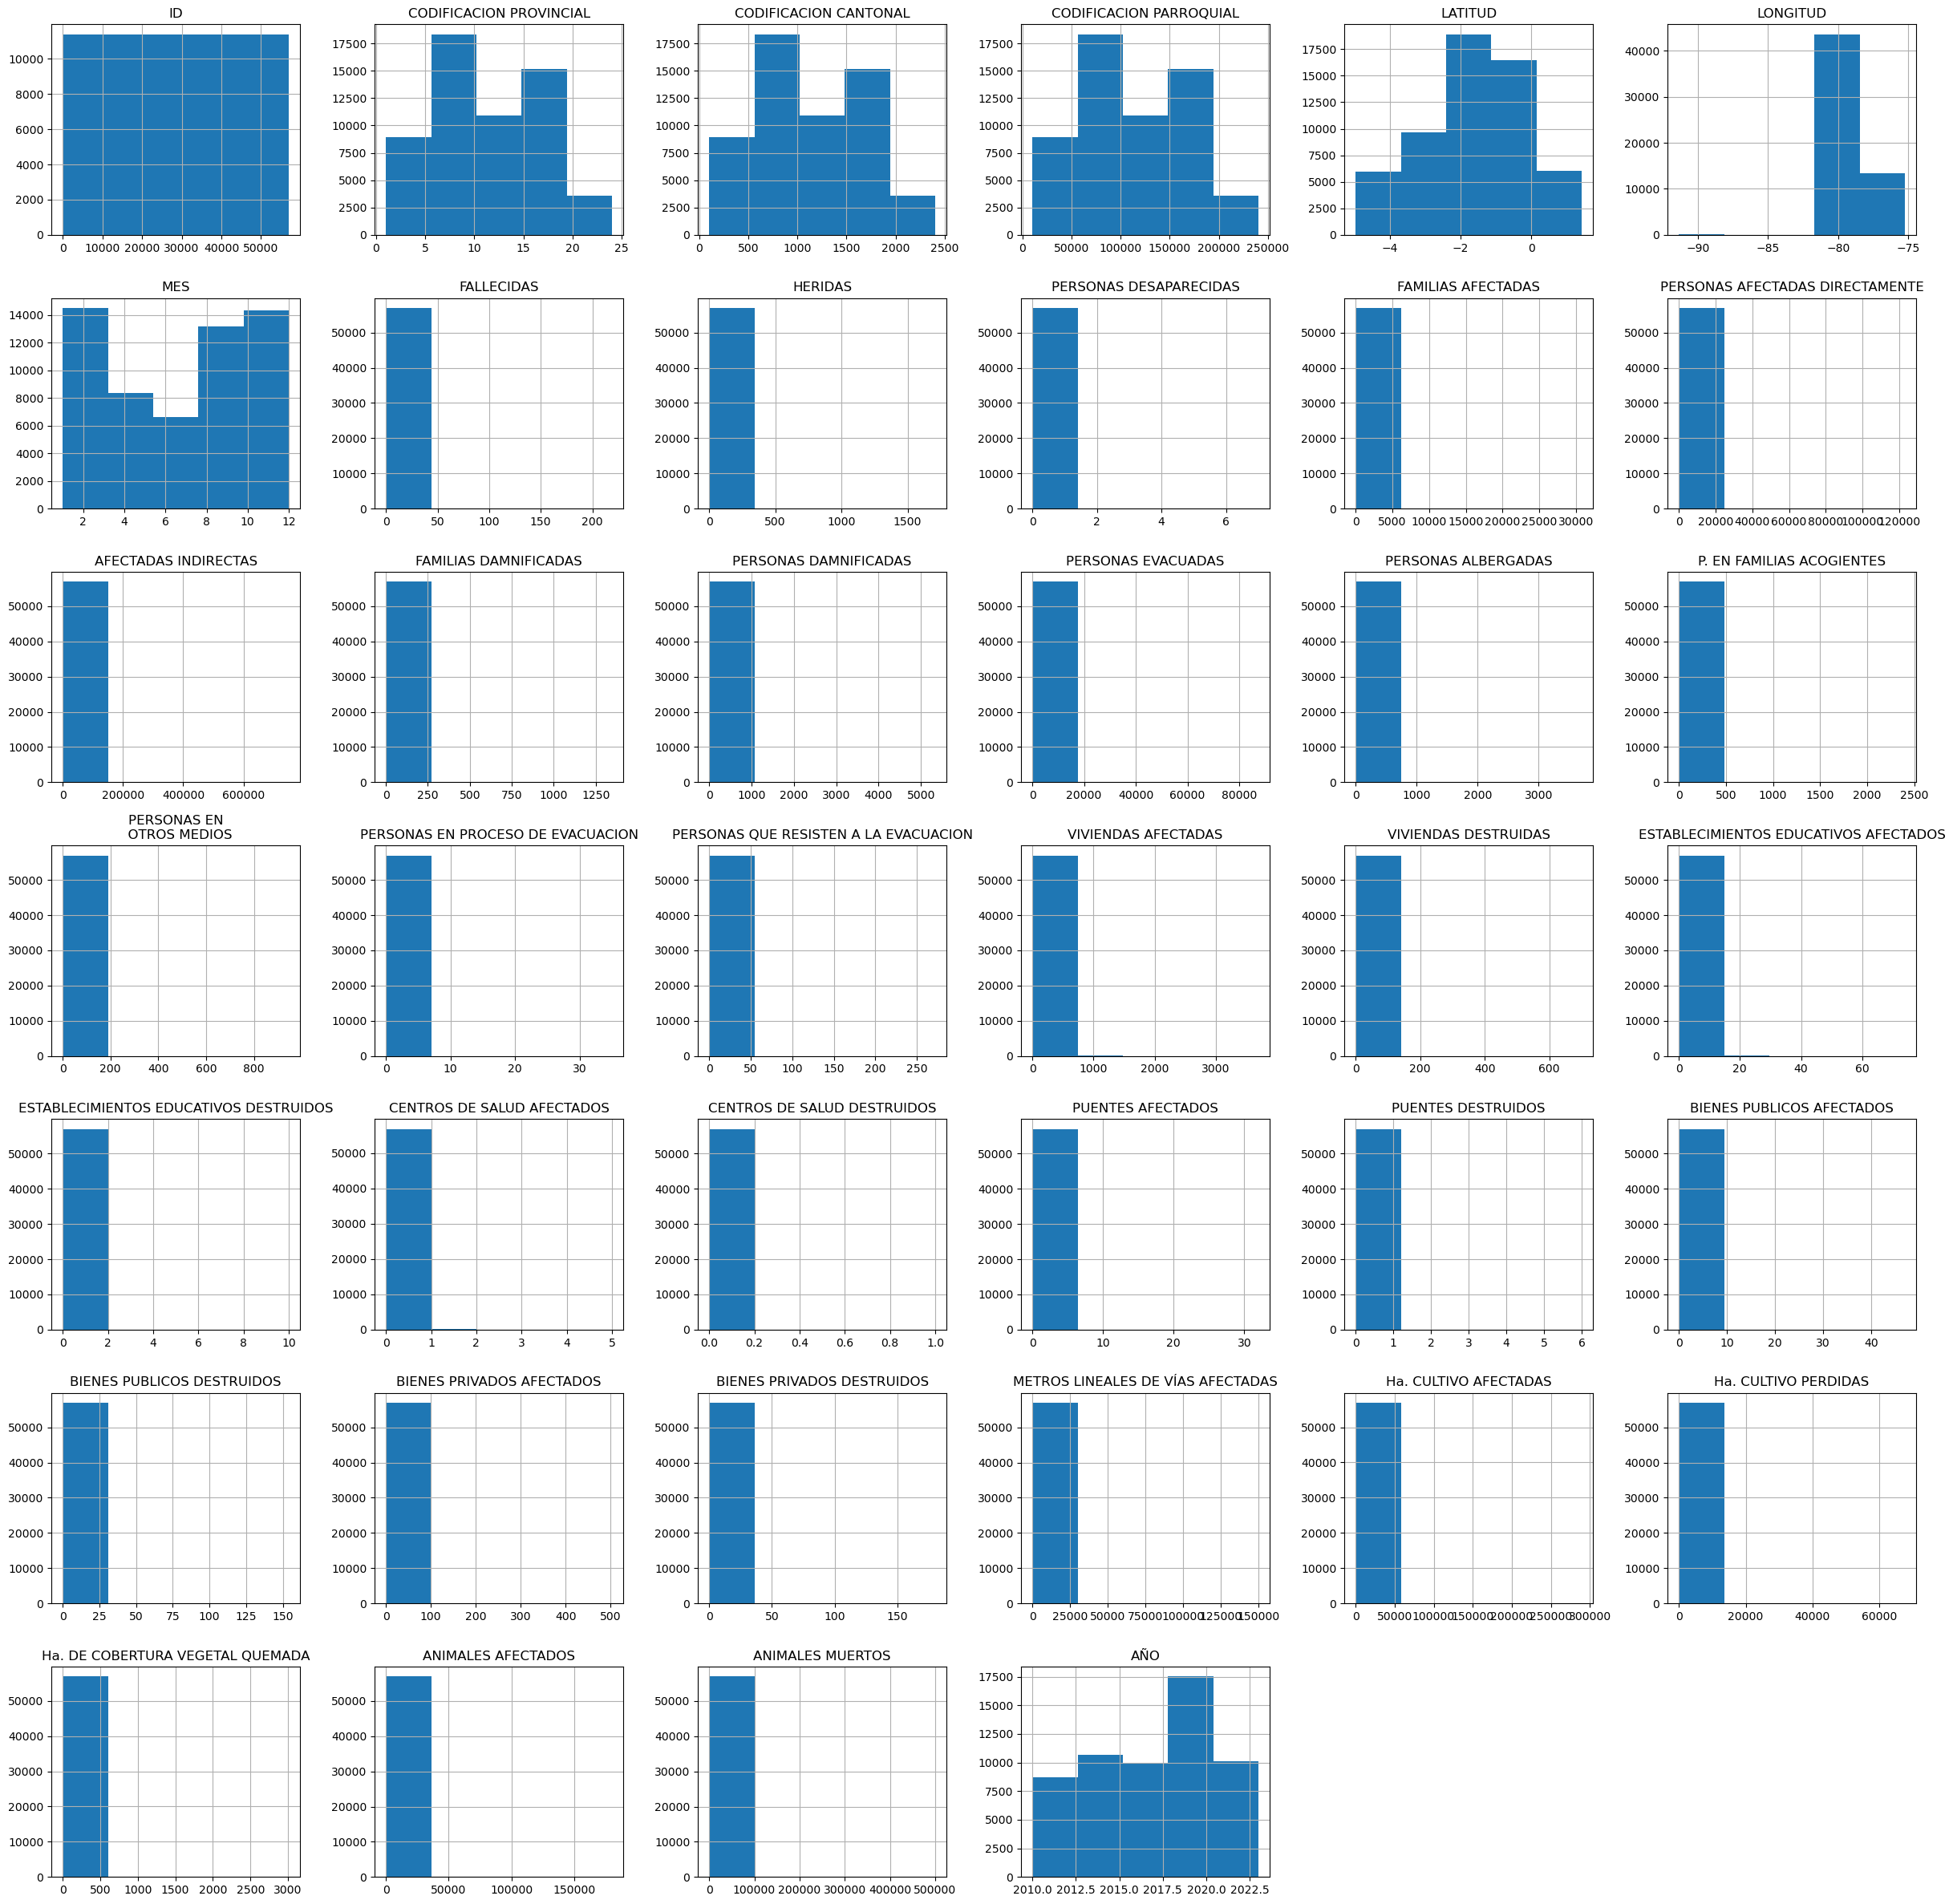

In [10]:
data1[var_cuantitativas].hist(bins = 5, figsize = (30,30));

Creamos un grafico de barras de cada variable cualitativa para ver como se encuentran distribuidas.

C:\Users\wilme\AppData\Local\Temp\ipykernel_16776\3319642774.py:8: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


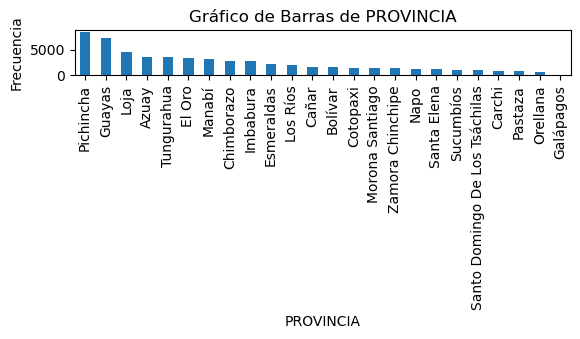

C:\Users\wilme\AppData\Local\Temp\ipykernel_16776\3319642774.py:8: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


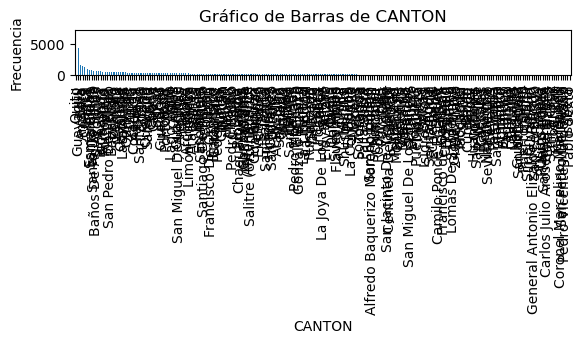

C:\Users\wilme\AppData\Local\Temp\ipykernel_16776\3319642774.py:8: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


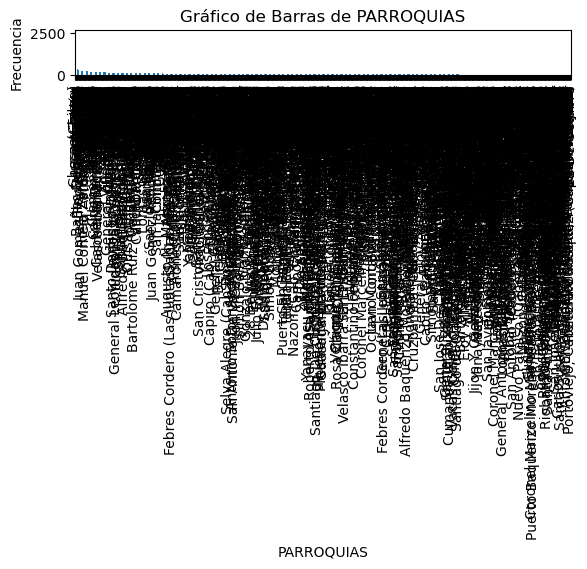

C:\Users\wilme\AppData\Local\Temp\ipykernel_16776\3319642774.py:8: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


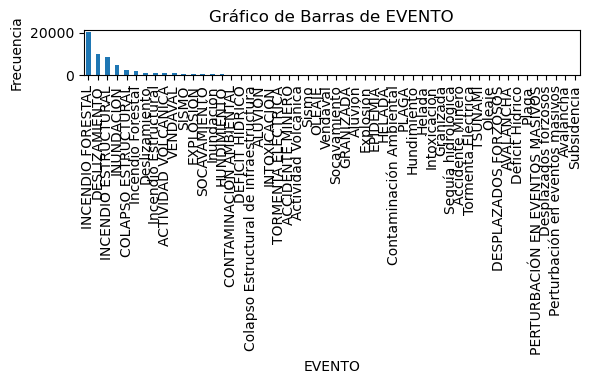

C:\Users\wilme\AppData\Local\Temp\ipykernel_16776\3319642774.py:8: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


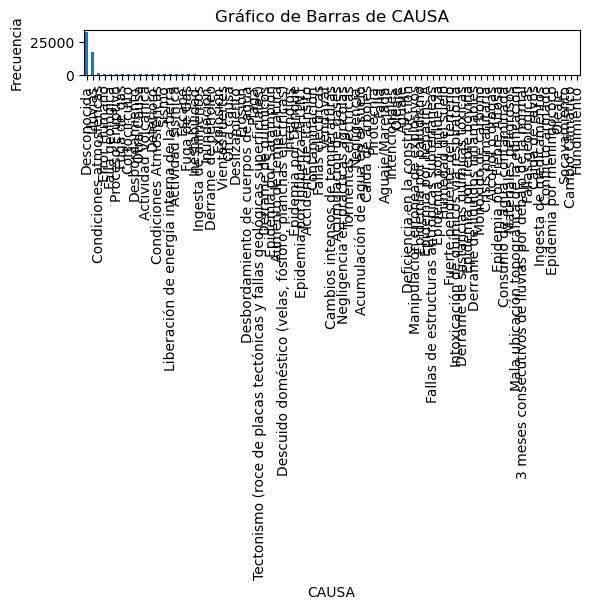

C:\Users\wilme\AppData\Local\Temp\ipykernel_16776\3319642774.py:8: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


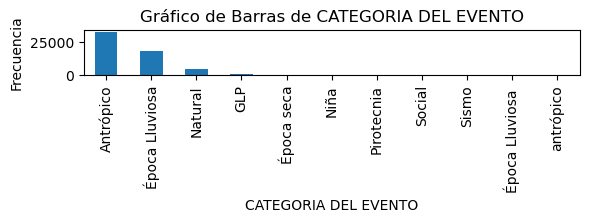

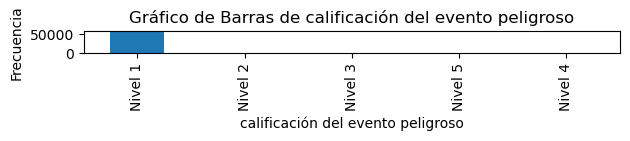

In [11]:
for variable in var_cualitativas:
    plt.subplot(len(var_cualitativas), 1, var_cualitativas.get_loc(variable) + 1)
    data1[variable].value_counts().plot(kind='bar')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    plt.title(f'Gráfico de Barras de {variable}')
    
    plt.tight_layout()
    plt.show()

Con los graficos podemos darnos cuenta que los campos de caton y parroquia no aportarian al analisis ya que la data se dispersaria, por lo tanto los eliminamos.

In [12]:
data2=data1.drop(['CANTON',
                 'PARROQUIAS',
                 'CODIFICACION CANTONAL',
                 'CODIFICACION PARROQUIAL'], axis=1)

### Homologar Campos

El resto de campos se los va a explorar mas a detalle con la finalidad de homologar las diferentes caracteristicas.

#### Evento

Observamos los valores unicos, en donde podemos ver que exsites registro entre mayusculas y minusculas, incluso con espacios en blanco.

In [13]:
valores_unicos = data2['EVENTO'].unique()
print(valores_unicos)

['INUNDACIÓN' 'DESLIZAMIENTO' 'INCENDIO FORESTAL' 'INCENDIO ESTRUCTURAL'
 'COLAPSO ESTRUCTURAL' 'ACTIVIDAD VOLCÁNICA' 'VENDAVAL' 'PLAGA'
 'TORMENTA ELÉCTRICA' 'HELADA' 'HUNDIMIENTO' 'DÉFICIT HÍDRICO' 'SISMO'
 'CONTAMINACIÓN AMBIENTAL' 'ALUVIÓN' 'EPIDEMIA' 'OLEAJE'
 'ACCIDENTE MINERO' 'SOCAVAMIENTO' 'INTOXICACIÓN' 'EXPLOSIÓN' 'TSUNAMI'
 'GRANIZADA' 'AVALANCHA' 'DESPLAZADOS FORZOSOS'
 'PERTURBACIÓN EN EVENTOS MASIVOS' 'Incendio Estructural'
 'Sequía hidrológica' 'Helada' 'Incendio Forestal' 'Deslizamiento'
 'Colapso Estructural de infraestructura' 'Inundación'
 'Actividad Volcánica' 'Accidente Minero' 'Aluvión' 'Vendaval' 'Granizada'
 'Explosión' 'Tormenta Eléctrica' 'Intoxicación' 'Socavamiento'
 'Contaminación Ambiental' 'Oleaje' 'Sismo' 'Hundimiento'
 'Déficit Hídrico' 'Desplazados forzosos'
 'Perturbación en eventos masivos' 'Avalancha' 'Subsidencia' 'Plaga']


Convertimos todos los registros en mayusculas.

In [14]:
data2['EVENTO'] = data2['EVENTO'].str.upper()
valores_unicos = data2['EVENTO'].unique()
print(valores_unicos)

['INUNDACIÓN' 'DESLIZAMIENTO' 'INCENDIO FORESTAL' 'INCENDIO ESTRUCTURAL'
 'COLAPSO ESTRUCTURAL' 'ACTIVIDAD VOLCÁNICA' 'VENDAVAL' 'PLAGA'
 'TORMENTA ELÉCTRICA' 'HELADA' 'HUNDIMIENTO' 'DÉFICIT HÍDRICO' 'SISMO'
 'CONTAMINACIÓN AMBIENTAL' 'ALUVIÓN' 'EPIDEMIA' 'OLEAJE'
 'ACCIDENTE MINERO' 'SOCAVAMIENTO' 'INTOXICACIÓN' 'EXPLOSIÓN' 'TSUNAMI'
 'GRANIZADA' 'AVALANCHA' 'DESPLAZADOS FORZOSOS'
 'PERTURBACIÓN EN EVENTOS MASIVOS' 'SEQUÍA HIDROLÓGICA'
 'COLAPSO ESTRUCTURAL DE INFRAESTRUCTURA' 'SUBSIDENCIA']


Creamos un mapeo de eventos para homologar cada uno de los que sean necesarios.

In [15]:
mapeo_eventos = {
'COLAPSO ESTRUCTURAL DE INFRAESTRUCTURA': 'COLAPSO ESTRUCTURAL'
}

data2['EVENTO'] = data2['EVENTO'].replace(mapeo_eventos)


valores_unicos = data2['EVENTO'].unique()
print(valores_unicos)

['INUNDACIÓN' 'DESLIZAMIENTO' 'INCENDIO FORESTAL' 'INCENDIO ESTRUCTURAL'
 'COLAPSO ESTRUCTURAL' 'ACTIVIDAD VOLCÁNICA' 'VENDAVAL' 'PLAGA'
 'TORMENTA ELÉCTRICA' 'HELADA' 'HUNDIMIENTO' 'DÉFICIT HÍDRICO' 'SISMO'
 'CONTAMINACIÓN AMBIENTAL' 'ALUVIÓN' 'EPIDEMIA' 'OLEAJE'
 'ACCIDENTE MINERO' 'SOCAVAMIENTO' 'INTOXICACIÓN' 'EXPLOSIÓN' 'TSUNAMI'
 'GRANIZADA' 'AVALANCHA' 'DESPLAZADOS FORZOSOS'
 'PERTURBACIÓN EN EVENTOS MASIVOS' 'SEQUÍA HIDROLÓGICA' 'SUBSIDENCIA']


Finalmente tenemos homologados todos los registros del campo Evento.

Se procede a hacer lo mismo con los campos de Categoria del Evento y Causa.

#### Categoria del Evento

In [16]:
valores_unicos = data2['CATEGORIA DEL EVENTO'].unique()
print(valores_unicos)

['Época Lluviosa' 'Natural' 'Antrópico' 'Niña' 'GLP' 'Pirotecnia'
 'Época Lluviosa ' 'Época seca' 'antrópico' 'Social' 'Sismo']


In [17]:
data2['CATEGORIA DEL EVENTO'] = data2['CATEGORIA DEL EVENTO'].str.upper()
valores_unicos = data2['CATEGORIA DEL EVENTO'].unique()
print(valores_unicos)

['ÉPOCA LLUVIOSA' 'NATURAL' 'ANTRÓPICO' 'NIÑA' 'GLP' 'PIROTECNIA'
 'ÉPOCA LLUVIOSA ' 'ÉPOCA SECA' 'SOCIAL' 'SISMO']


In [18]:
mapeo_eventos = {
'ÉPOCA LLUVIOSA ': 'ÉPOCA LLUVIOSA',
'NIÑA': 'ÉPOCA LLUVIOSA',
'SISMO': 'NATURAL',
'SOCIAL': 'ANTRÓPICO'   
}

data2['CATEGORIA DEL EVENTO'] = data2['CATEGORIA DEL EVENTO'].replace(mapeo_eventos)


valores_unicos = data2['CATEGORIA DEL EVENTO'].unique()
print(valores_unicos)

['ÉPOCA LLUVIOSA' 'NATURAL' 'ANTRÓPICO' 'GLP' 'PIROTECNIA' 'ÉPOCA SECA']


#### Causa

In [19]:
valores_unicos = data2['CAUSA'].unique()
print(valores_unicos)

['Lluvias' 'Desconocida' 'Error Humano' 'Proceso Eruptivo'
 'Condiciones atmosféricas' 'Deslizamiento' 'Cortocircuito' 'Otra Causa'
 'Epidemia por Fiebre Aftosa' 'Epidemia por Dengue' 'Falla geológica'
 'Epidemia por Influenza AH1N1' 'Fuga de gas' 'Deterioro' 'Desbordamiento'
 'Ingesta de alimentos' 'Sismo' 'Otra causa' 'Epidemia por fiebre bovina'
 'Epidemia por hepatitis A' 'Epidemia por Sarampión'
 'Epidemia por meningococo' 'Epidemia por influenza' 'Vendaval'
 'Explosión' 'Derrame de químicos' 'Derrame de petróleo' 'Erosión'
 'Inestabilidad' 'Derrame de líquidos inflamables' 'Oleaje '
 'Epidemia por paludismo' 'Oleaje' 'Socavamiento' 'Crisis humanitaria'
 'Accidente de Tránsito' 'Aguaje' 'Pirotécnia' 'Negligencia' 'Escape'
 'Condiciones Atmosféricas' 'Actividad Volcánica' 'Cambio Climático'
 'Inundación' 'Contaminación' 'Falla' 'Plaga' 'Aumento de temperatura'
 'Caída de árboles' 'Fallas eléctricas'
 'Liberación de energía interna de la tierra'
 'Desbordamiento de cuerpos de agua' 

In [20]:
data2['CAUSA'] = data2['CAUSA'].str.upper()
valores_unicos = data2['CAUSA'].unique()
print(valores_unicos)

['LLUVIAS' 'DESCONOCIDA' 'ERROR HUMANO' 'PROCESO ERUPTIVO'
 'CONDICIONES ATMOSFÉRICAS' 'DESLIZAMIENTO' 'CORTOCIRCUITO' 'OTRA CAUSA'
 'EPIDEMIA POR FIEBRE AFTOSA' 'EPIDEMIA POR DENGUE' 'FALLA GEOLÓGICA'
 'EPIDEMIA POR INFLUENZA AH1N1' 'FUGA DE GAS' 'DETERIORO' 'DESBORDAMIENTO'
 'INGESTA DE ALIMENTOS' 'SISMO' 'EPIDEMIA POR FIEBRE BOVINA'
 'EPIDEMIA POR HEPATITIS A' 'EPIDEMIA POR SARAMPIÓN'
 'EPIDEMIA POR MENINGOCOCO' 'EPIDEMIA POR INFLUENZA' 'VENDAVAL'
 'EXPLOSIÓN' 'DERRAME DE QUÍMICOS' 'DERRAME DE PETRÓLEO' 'EROSIÓN'
 'INESTABILIDAD' 'DERRAME DE LÍQUIDOS INFLAMABLES' 'OLEAJE '
 'EPIDEMIA POR PALUDISMO' 'OLEAJE' 'SOCAVAMIENTO' 'CRISIS HUMANITARIA'
 'ACCIDENTE DE TRÁNSITO' 'AGUAJE' 'PIROTÉCNIA' 'NEGLIGENCIA' 'ESCAPE'
 'ACTIVIDAD VOLCÁNICA' 'CAMBIO CLIMÁTICO' 'INUNDACIÓN' 'CONTAMINACIÓN'
 'FALLA' 'PLAGA' 'AUMENTO DE TEMPERATURA' 'CAÍDA DE ÁRBOLES'
 'FALLAS ELÉCTRICAS' 'LIBERACIÓN DE ENERGÍA INTERNA DE LA TIERRA'
 'DESBORDAMIENTO DE CUERPOS DE AGUA' 'VIENTOS FUERTES'
 'DESCUIDO DOMÉSTICO (V

In [21]:
mapeo_eventos = {
'AGUAJE/MAREJADA': 'AGUAJE',
'DESBORDAMIENTO DE CUERPOS DE AGUA': 'DESBORDAMIENTO',
'OLEAJE ': 'OLEAJE'
}

data2['CAUSA'] = data2['CAUSA'].replace(mapeo_eventos)


valores_unicos = data2['CAUSA'].unique()
print(valores_unicos)

['LLUVIAS' 'DESCONOCIDA' 'ERROR HUMANO' 'PROCESO ERUPTIVO'
 'CONDICIONES ATMOSFÉRICAS' 'DESLIZAMIENTO' 'CORTOCIRCUITO' 'OTRA CAUSA'
 'EPIDEMIA POR FIEBRE AFTOSA' 'EPIDEMIA POR DENGUE' 'FALLA GEOLÓGICA'
 'EPIDEMIA POR INFLUENZA AH1N1' 'FUGA DE GAS' 'DETERIORO' 'DESBORDAMIENTO'
 'INGESTA DE ALIMENTOS' 'SISMO' 'EPIDEMIA POR FIEBRE BOVINA'
 'EPIDEMIA POR HEPATITIS A' 'EPIDEMIA POR SARAMPIÓN'
 'EPIDEMIA POR MENINGOCOCO' 'EPIDEMIA POR INFLUENZA' 'VENDAVAL'
 'EXPLOSIÓN' 'DERRAME DE QUÍMICOS' 'DERRAME DE PETRÓLEO' 'EROSIÓN'
 'INESTABILIDAD' 'DERRAME DE LÍQUIDOS INFLAMABLES' 'OLEAJE'
 'EPIDEMIA POR PALUDISMO' 'SOCAVAMIENTO' 'CRISIS HUMANITARIA'
 'ACCIDENTE DE TRÁNSITO' 'AGUAJE' 'PIROTÉCNIA' 'NEGLIGENCIA' 'ESCAPE'
 'ACTIVIDAD VOLCÁNICA' 'CAMBIO CLIMÁTICO' 'INUNDACIÓN' 'CONTAMINACIÓN'
 'FALLA' 'PLAGA' 'AUMENTO DE TEMPERATURA' 'CAÍDA DE ÁRBOLES'
 'FALLAS ELÉCTRICAS' 'LIBERACIÓN DE ENERGÍA INTERNA DE LA TIERRA'
 'VIENTOS FUERTES'
 'DESCUIDO DOMÉSTICO (VELAS, FÓSFORO, PLANCHAS ELÉCTRICAS)'
 'DEFICIE

In [22]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56986 entries, 0 to 56985
Data columns (total 44 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   ID                                      56986 non-null  int64         
 1   PROVINCIA                               56986 non-null  object        
 2   CODIFICACION PROVINCIAL                 56986 non-null  int64         
 3   LATITUD                                 56986 non-null  float64       
 4   LONGITUD                                56986 non-null  float64       
 5   EVENTO                                  56986 non-null  object        
 6   CAUSA                                   56986 non-null  object        
 7   CATEGORIA DEL EVENTO                    56986 non-null  object        
 8   FECHA DEL EVENTO                        56986 non-null  datetime64[ns]
 9   MES                                     56986 non-

In [23]:
correlation_matrix = data2.corr()

# Crear un mapa de calor
plt.figure(figsize=(30, 20))  # Tamaño del gráfico
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
# annot=True agrega los valores de correlación en las celdas
# cmap="coolwarm" elige una paleta de colores para el mapa de calor
# linewidths=0.5 establece el ancho de las líneas divisorias entre celdas

plt.title('Matriz de Correlación')  # Título del gráfico
plt.show()

ValueError: could not convert string to float: 'Azuay'

Renombramos el campo calificacion del evento peligroso para que se puede entender mejor.

In [24]:
data2.rename({'calificación del evento peligroso': 'CALIFICACION EVENTO PELIGROSO'}, axis=1, inplace=True)

In [25]:
data_grouped = data2.groupby(['FECHA DEL EVENTO',
                              'AÑO', 
                              'MES', 
                              'PROVINCIA', 
                              'CODIFICACION PROVINCIAL',
                              'EVENTO',
                              'CAUSA',
                              'CATEGORIA DEL EVENTO', 
                              'CALIFICACION EVENTO PELIGROSO',
                              'LATITUD',
                              'LONGITUD'
                             ]).agg({
                                    'FALLECIDAS': 'sum',
                                    'HERIDAS': 'sum',
                                    'PERSONAS DESAPARECIDAS': 'sum',
                                    'FAMILIAS AFECTADAS': 'sum',
                                    'PERSONAS AFECTADAS DIRECTAMENTE': 'sum',
                                    'AFECTADAS INDIRECTAS': 'sum',      
                                    'FAMILIAS DAMNIFICADAS': 'sum',      
                                    'PERSONAS DAMNIFICADAS': 'sum',      
                                    'PERSONAS EVACUADAS': 'sum',      
                                    'PERSONAS ALBERGADAS': 'sum',                  
                                    'VIVIENDAS AFECTADAS': 'sum',      
                                    'VIVIENDAS DESTRUIDAS': 'sum',      
                                    'ESTABLECIMIENTOS EDUCATIVOS AFECTADOS': 'sum',      
                                    'ESTABLECIMIENTOS EDUCATIVOS DESTRUIDOS': 'sum',      
                                    'CENTROS DE SALUD AFECTADOS': 'sum',      
                                    'CENTROS DE SALUD DESTRUIDOS': 'sum',      
                                    'PUENTES AFECTADOS': 'sum',      
                                    'PUENTES DESTRUIDOS': 'sum',      
                                    'BIENES PUBLICOS AFECTADOS': 'sum',      
                                    'BIENES PUBLICOS DESTRUIDOS': 'sum',      
                                    'BIENES PRIVADOS AFECTADOS': 'sum',      
                                    'BIENES PRIVADOS DESTRUIDOS': 'sum',          
                                    'Ha. CULTIVO AFECTADAS': 'sum',      
                                    'Ha. CULTIVO PERDIDAS': 'sum',      
                                    'Ha. DE COBERTURA VEGETAL QUEMADA': 'sum',      
                                    'ANIMALES AFECTADOS': 'sum',      
                                    'ANIMALES MUERTOS': 'sum'
                                    }).reset_index().rename(columns={
                                                                    'FALLECIDAS': 'FALLECIDAS',
                                                                    'HERIDAS': 'HERIDAS',
                                                                    'PERSONAS DESAPARECIDAS': 'PERSONAS DESAPARECIDAS',
                                                                    'FAMILIAS AFECTADAS': 'FAMILIAS AFECTADAS',
                                                                    'PERSONAS AFECTADAS DIRECTAMENTE': 'PERSONAS AFECTADAS DIRECTAMENTE',
                                                                    'AFECTADAS INDIRECTAS': 'PERSONAS AFECTADAS INDIRECTAMENTE',      
                                                                    'FAMILIAS DAMNIFICADAS': 'FAMILIAS DAMNIFICADAS',      
                                                                    'PERSONAS DAMNIFICADAS': 'PERSONAS DAMNIFICADAS',      
                                                                    'PERSONAS EVACUADAS': 'PERSONAS EVACUADAS',      
                                                                    'PERSONAS ALBERGADAS': 'PERSONAS ALBERGADAS',                  
                                                                    'VIVIENDAS AFECTADAS': 'VIVIENDAS AFECTADAS',      
                                                                    'VIVIENDAS DESTRUIDAS': 'VIVIENDAS DESTRUIDAS',      
                                                                    'ESTABLECIMIENTOS EDUCATIVOS AFECTADOS': 'ESTABLECIMIENTOS EDUCATIVOS AFECTADOS',      
                                                                    'ESTABLECIMIENTOS EDUCATIVOS DESTRUIDOS': 'ESTABLECIMIENTOS EDUCATIVOS DESTRUIDOS',      
                                                                    'CENTROS DE SALUD AFECTADOS': 'CENTROS DE SALUD AFECTADOS',      
                                                                    'CENTROS DE SALUD DESTRUIDOS': 'CENTROS DE SALUD DESTRUIDOS',      
                                                                    'PUENTES AFECTADOS': 'PUENTES AFECTADOS',      
                                                                    'PUENTES DESTRUIDOS': 'PUENTES DESTRUIDOS',      
                                                                    'BIENES PUBLICOS AFECTADOS': 'BIENES PUBLICOS AFECTADOS',      
                                                                    'BIENES PUBLICOS DESTRUIDOS': 'BIENES PUBLICOS DESTRUIDOS',      
                                                                    'BIENES PRIVADOS AFECTADOS': 'BIENES PRIVADOS AFECTADOS',      
                                                                    'BIENES PRIVADOS DESTRUIDOS': 'BIENES PRIVADOS DESTRUIDOS',          
                                                                    'Ha. CULTIVO AFECTADAS': 'HECTAREAS CULTIVO AFECTADAS',      
                                                                    'Ha. CULTIVO PERDIDAS': 'HECTAREAS CULTIVO PERDIDAS',      
                                                                    'Ha. DE COBERTURA VEGETAL QUEMADA': 'HECTAREAS COBERTURA VEGETAL QUEMADA',      
                                                                    'ANIMALES AFECTADOS': 'ANIMALES AFECTADOS',      
                                                                    'ANIMALES MUERTOS': 'ANIMALES MUERTOS'
                                                                    })

# Agregar una columna para contar la frecuencia de eventos
data_grouped['CANTIDAD EVENTOS'] = data_grouped.groupby(['FECHA DEL EVENTO',
                                                 'AÑO', 
                                                 'MES', 
                                                 'PROVINCIA', 
                                                 'CODIFICACION PROVINCIAL',
                                                 'EVENTO',
                                                 'CAUSA',
                                                 'CATEGORIA DEL EVENTO', 
                                                 'CALIFICACION EVENTO PELIGROSO',
                                                 'LATITUD',
                                                 'LONGITUD']).size().reset_index(name='frecuencia')['frecuencia']

# Mostrar los primeros registros del DataFrame agrupado
data_grouped.head()

,FECHA DEL EVENTO,AÑO,MES,PROVINCIA,CODIFICACION PROVINCIAL,EVENTO,CAUSA,CATEGORIA DEL EVENTO,CALIFICACION EVENTO PELIGROSO,LATITUD,...,BIENES PUBLICOS AFECTADOS,BIENES PUBLICOS DESTRUIDOS,BIENES PRIVADOS AFECTADOS,BIENES PRIVADOS DESTRUIDOS,HECTAREAS CULTIVO AFECTADAS,HECTAREAS CULTIVO PERDIDAS,HECTAREAS COBERTURA VEGETAL QUEMADA,ANIMALES AFECTADOS,ANIMALES MUERTOS,CANTIDAD EVENTOS
0,2010-01-07,2010,1,Tungurahua,18,ACTIVIDAD VOLCÁNICA,PROCESO ERUPTIVO,NATURAL,Nivel 1,-1.424526,...,0,0,0,0,0.0,0.0,0.0,0,0,1
1,2010-01-08,2010,1,Galápagos,20,TORMENTA ELÉCTRICA,CONDICIONES ATMOSFÉRICAS,ÉPOCA LLUVIOSA,Nivel 1,-0.905774,...,0,0,0,0,0.0,0.0,0.0,0,0,1
2,2010-01-08,2010,1,Galápagos,20,TORMENTA ELÉCTRICA,CONDICIONES ATMOSFÉRICAS,ÉPOCA LLUVIOSA,Nivel 1,-0.741672,...,0,0,0,0,0.0,0.0,0.0,0,0,1
3,2010-01-20,2010,1,Esmeraldas,8,INUNDACIÓN,LLUVIAS,ÉPOCA LLUVIOSA,Nivel 2,1.023975,...,0,0,0,0,0.0,0.0,0.0,0,0,1
4,2010-02-06,2010,2,Manabí,13,INUNDACIÓN,LLUVIAS,ÉPOCA LLUVIOSA,Nivel 1,-0.395226,...,0,0,0,0,0.0,0.0,0.0,0,0,1


In [26]:
data_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53654 entries, 0 to 53653
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   FECHA DEL EVENTO                        53654 non-null  datetime64[ns]
 1   AÑO                                     53654 non-null  int64         
 2   MES                                     53654 non-null  int64         
 3   PROVINCIA                               53654 non-null  object        
 4   CODIFICACION PROVINCIAL                 53654 non-null  int64         
 5   EVENTO                                  53654 non-null  object        
 6   CAUSA                                   53654 non-null  object        
 7   CATEGORIA DEL EVENTO                    53654 non-null  object        
 8   CALIFICACION EVENTO PELIGROSO           53654 non-null  object        
 9   LATITUD                                 53654 non-

In [27]:
data_grouped = data2.groupby(['FECHA DEL EVENTO', 
                              'AÑO', 
                              'MES',
                              'PROVINCIA', 
                              'CODIFICACION PROVINCIAL',
                              'EVENTO',
                              'CAUSA',
                              'CATEGORIA DEL EVENTO', 
                              'CALIFICACION EVENTO PELIGROSO',
                             ]).agg({
                                    'ID': 'count'
                                    }).reset_index().rename(columns={
                                                                    'ID': 'NUM EVENTOS'
                                                                    })
# Mostrar los primeros registros del DataFrame agrupado
data_grouped.head()

,FECHA DEL EVENTO,AÑO,MES,PROVINCIA,CODIFICACION PROVINCIAL,EVENTO,CAUSA,CATEGORIA DEL EVENTO,CALIFICACION EVENTO PELIGROSO,NUM EVENTOS
0,2010-01-07,2010,1,Tungurahua,18,ACTIVIDAD VOLCÁNICA,PROCESO ERUPTIVO,NATURAL,Nivel 1,1
1,2010-01-08,2010,1,Galápagos,20,TORMENTA ELÉCTRICA,CONDICIONES ATMOSFÉRICAS,ÉPOCA LLUVIOSA,Nivel 1,2
2,2010-01-20,2010,1,Esmeraldas,8,INUNDACIÓN,LLUVIAS,ÉPOCA LLUVIOSA,Nivel 2,1
3,2010-02-06,2010,2,Manabí,13,INUNDACIÓN,LLUVIAS,ÉPOCA LLUVIOSA,Nivel 1,1
4,2010-02-06,2010,2,Santo Domingo De Los Tsáchilas,23,INUNDACIÓN,LLUVIAS,ÉPOCA LLUVIOSA,Nivel 1,1


In [28]:
data_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37062 entries, 0 to 37061
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   FECHA DEL EVENTO               37062 non-null  datetime64[ns]
 1   AÑO                            37062 non-null  int64         
 2   MES                            37062 non-null  int64         
 3   PROVINCIA                      37062 non-null  object        
 4   CODIFICACION PROVINCIAL        37062 non-null  int64         
 5   EVENTO                         37062 non-null  object        
 6   CAUSA                          37062 non-null  object        
 7   CATEGORIA DEL EVENTO           37062 non-null  object        
 8   CALIFICACION EVENTO PELIGROSO  37062 non-null  object        
 9   NUM EVENTOS                    37062 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 2.8+ MB


In [29]:
valores_unicos = data_grouped['NUM EVENTOS'].unique()
print(valores_unicos)

[ 1  2  3  4  5  7  6  8  9 10 18 12 13 11 17 21 25 14 15 40 22 32 35 31
 49 46 29 34 30 51 38 16 53 23 36 24 39 48 43 47 50 37 26 45 28 33 20 19
 60]


In [30]:
nombre_archivo = 'C:/Users/wilme/Documents/Maestria/Proyecto Capstone/base_eventos.xlsx'
data_grouped.to_excel(nombre_archivo, index=False)

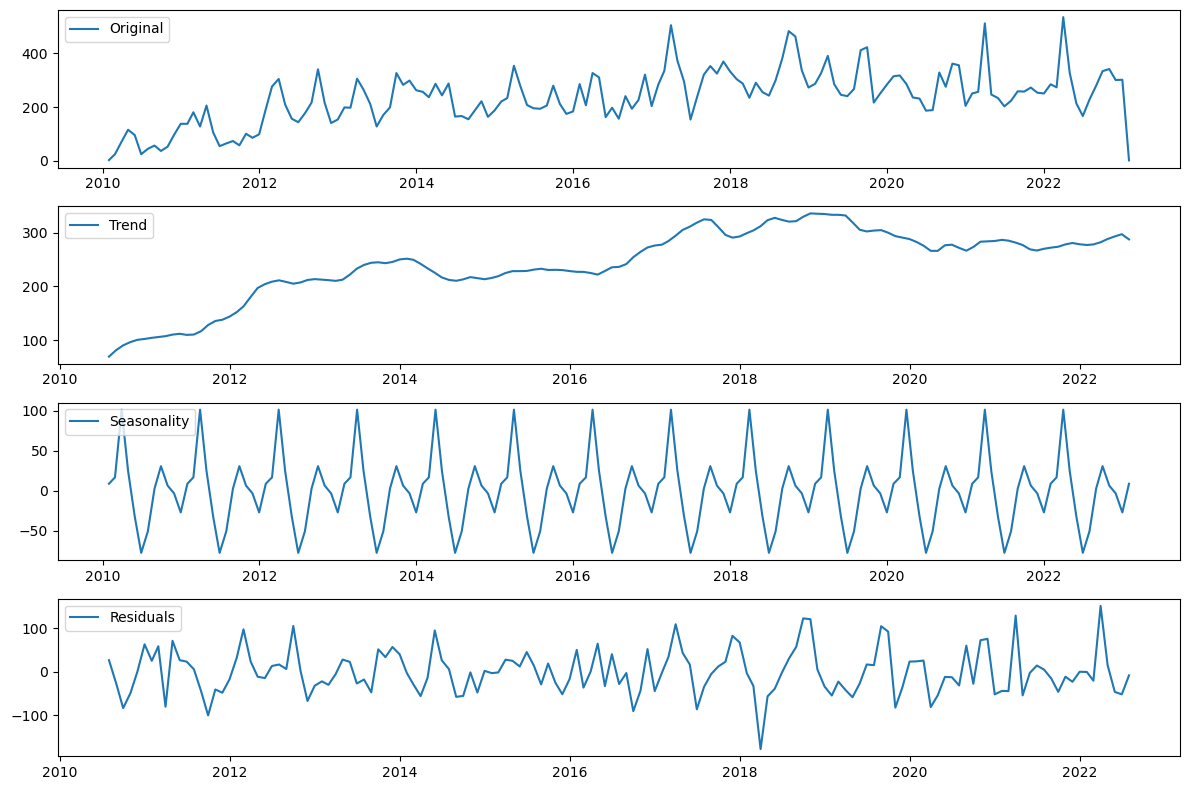

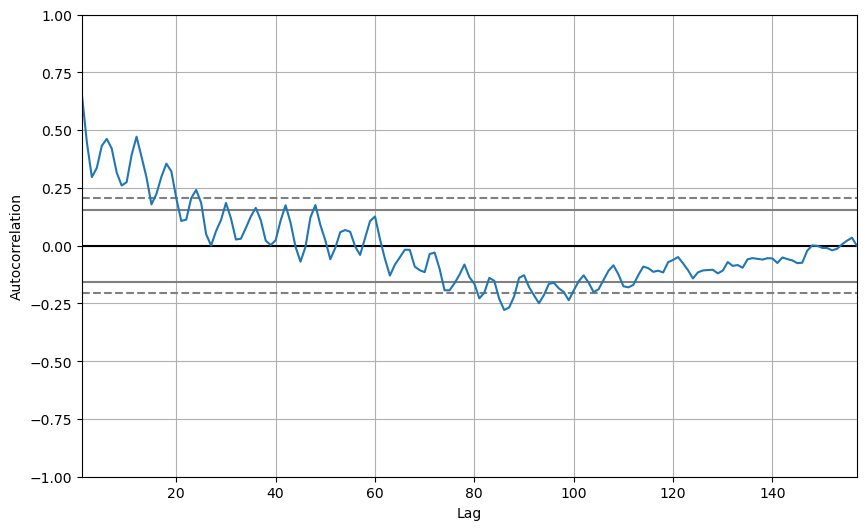

(-2.783266749783693,
 0.060704033695101814,
 11,
 145,
 {'1%': -3.476273058920005,
  '5%': -2.881687616548444,
  '10%': -2.5775132580261593},
 1610.703613313758)

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot

# Preparación de los datos para la serie temporal
# Agregamos los datos para obtener el total de eventos por mes
data_grouped['FECHA DEL EVENTO'] = pd.to_datetime(data_grouped['FECHA DEL EVENTO'])
monthly_data = data_grouped.groupby(pd.Grouper(key='FECHA DEL EVENTO', freq='M')).size()

# Análisis Exploratorio
# Descomposición de la serie temporal en tendencia, estacionalidad y residuo
decomposition = seasonal_decompose(monthly_data, model='additive')

# Prueba de Dickey-Fuller para verificar la estacionariedad
adf_result = adfuller(monthly_data)

# Visualización de la serie temporal y su descomposición
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(monthly_data, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()

# Visualización de la autocorrelación
plt.figure(figsize=(10, 6))
autocorrelation_plot(monthly_data)
plt.show()

# Resultados de la prueba de Dickey-Fuller
adf_result


In [32]:
monthly_data_diff = monthly_data.diff().dropna()

In [33]:
adf_result = adfuller(monthly_data_diff)
print('p-valor:', adf_result[1])

p-valor: 7.018956660316122e-11


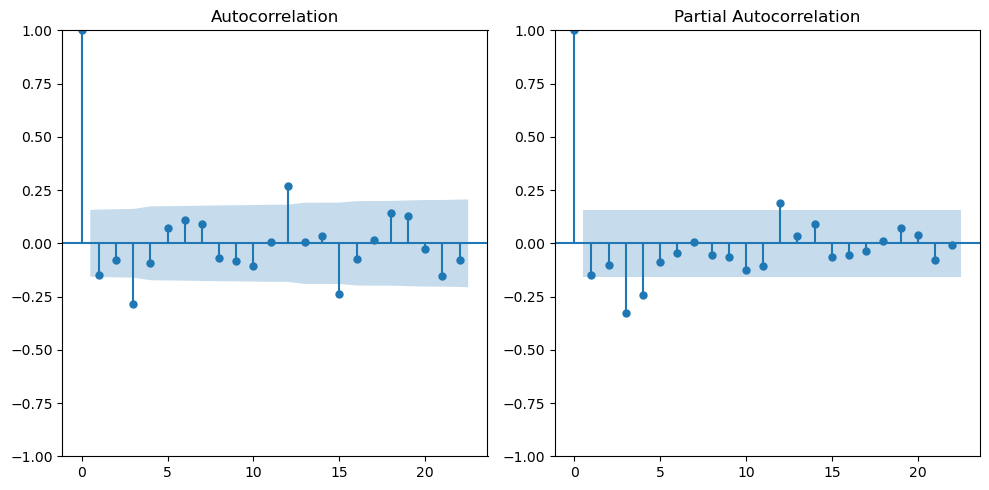

In [34]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(10, 5))
plt.subplot(121)
plot_acf(monthly_data_diff, ax=plt.gca())
plt.subplot(122)
plot_pacf(monthly_data_diff, ax=plt.gca())
plt.tight_layout()
plt.show()

In [35]:
from statsmodels.tsa.arima.model import ARIMA
p = 3
d = 1
q = 3

# Entrenamiento del modelo ARIMA
model = ARIMA(monthly_data, order=(p, d, q))
model_fit = model.fit()

C:\Users\wilme\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [36]:
predictions = model_fit.forecast(steps=12)  # Predicciones para los próximos 12 meses
print(predictions)

2023-02-28    192.822372
2023-03-31    270.984556
2023-04-30    276.021833
2023-05-31    237.504174
2023-06-30    204.243841
2023-07-31    212.410433
2023-08-31    254.389333
2023-09-30    288.159868
2023-10-31    280.032375
2023-11-30    238.451497
2023-12-31    205.289323
2024-01-31    213.698468
Freq: M, Name: predicted_mean, dtype: float64


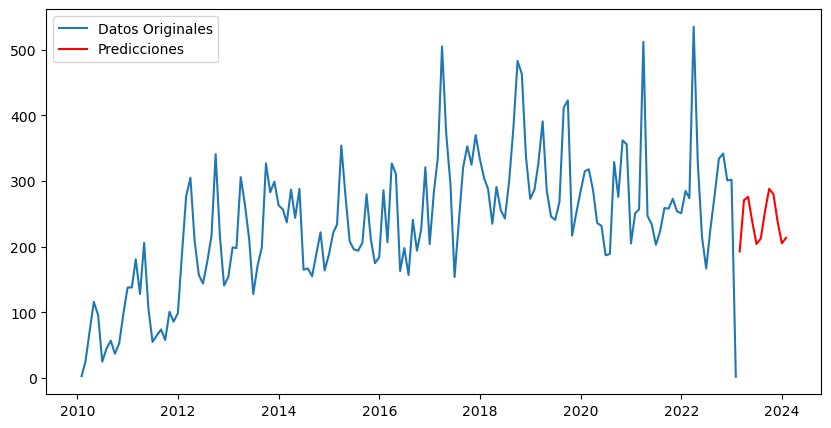

In [37]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_data, label='Datos Originales')
plt.plot(predictions, label='Predicciones', color='red')
plt.legend()
plt.show()

C:\Users\wilme\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\wilme\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


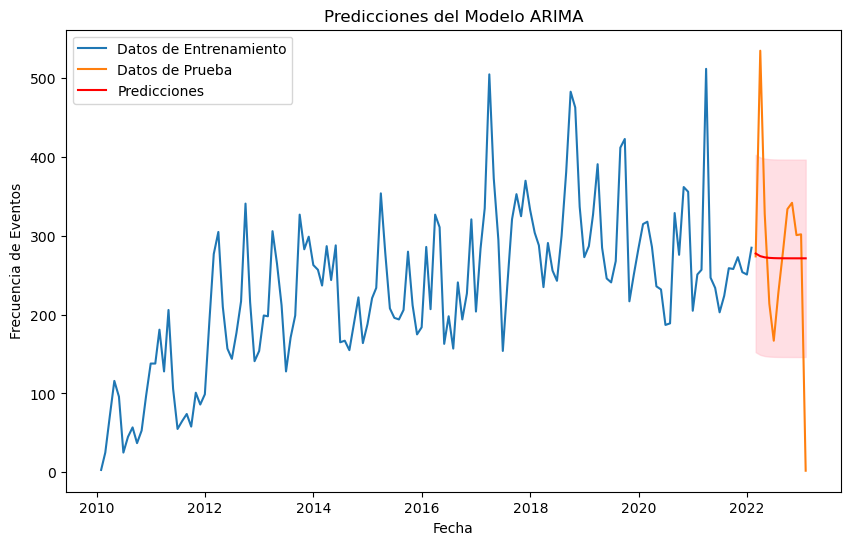

In [38]:
# Dividir los datos en entrenamiento y prueba
train = monthly_data[:-12]  # Ejemplo: usar todos los datos excepto los últimos 12 meses
test = monthly_data[-12:]   # Los últimos 12 meses para la prueba

# Ajustar el modelo ARIMA (reemplazar con tus parámetros óptimos)
model = ARIMA(train, order=(1, 1, 1))  # Ejemplo: ARIMA(1,1,1)
model_fit = model.fit()

# Hacer predicciones
predictions = model_fit.forecast(steps=12)

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Datos de Entrenamiento')
plt.plot(test.index, test, label='Datos de Prueba')
plt.plot(test.index, predictions, label='Predicciones', color='red')
plt.fill_between(test.index, predictions - 1.96*model_fit.resid.std(),
                 predictions + 1.96*model_fit.resid.std(), color='pink', alpha=0.5)
plt.title('Predicciones del Modelo ARIMA')
plt.xlabel('Fecha')
plt.ylabel('Frecuencia de Eventos')
plt.legend()
plt.show()

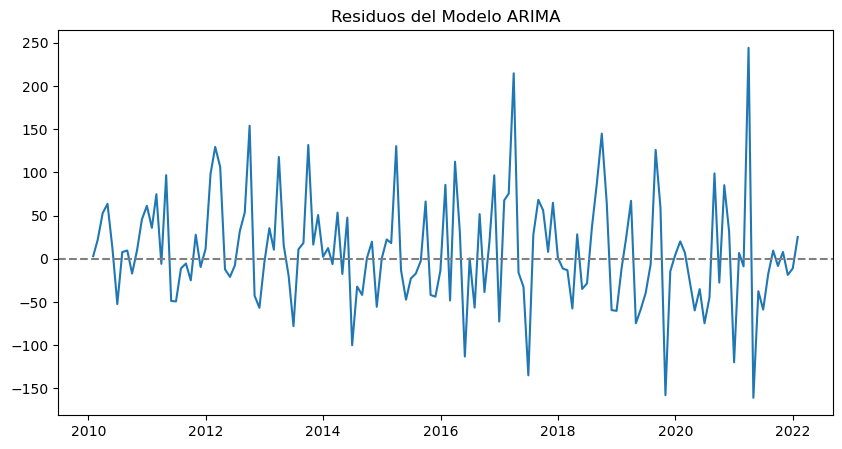

p-valor de los residuos: 1.7036806247244527e-15


In [39]:
# Calculando los residuos
residuos = model_fit.resid

# Visualización de los residuos
plt.figure(figsize=(10,5))
plt.plot(residuos)
plt.title('Residuos del Modelo ARIMA')
plt.axhline(0, linestyle='--', color='gray')
plt.show()

# Prueba de Dickey-Fuller en los residuos para comprobar la estacionariedad
adf_test_residuos = adfuller(residuos.dropna())
print('p-valor de los residuos:', adf_test_residuos[1])

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Asegúrate de tener un conjunto de prueba para comparar tus predicciones
# Por ejemplo, si has reservado los últimos 12 meses de tus datos como prueba:
test_data = monthly_data[-12:]
predictions = model_fit.forecast(steps=12)

mse = mean_squared_error(test_data, predictions)
mae = mean_absolute_error(test_data, predictions)

print(f'MSE: {mse}')
print(f'MAE: {mae}')


MSE: 14222.415170164555
MAE: 83.07072635797594


In [41]:
# Puedes usar TimeSeriesSplit de sklearn para esto
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)  # O el número de divisiones que desees

for train_index, test_index in tscv.split(monthly_data):
    train, test = monthly_data[train_index], monthly_data[test_index]
    model = ARIMA(train, order=(p, d, q)).fit()
    predictions = model.forecast(steps=len(test))
    error = mean_squared_error(test, predictions)
    print(f'MSE para la división: {error}')


C:\Users\wilme\AppData\Local\Temp\ipykernel_16776\729906454.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train, test = monthly_data[train_index], monthly_data[test_index]
C:\Users\wilme\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\wilme\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\wilme\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Che

MSE para la división: 6576.2273700262485
MSE para la división: 5548.094195529373


C:\Users\wilme\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\wilme\AppData\Local\Temp\ipykernel_16776\729906454.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train, test = monthly_data[train_index], monthly_data[test_index]


MSE para la división: 11848.61941440442


C:\Users\wilme\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\wilme\AppData\Local\Temp\ipykernel_16776\729906454.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train, test = monthly_data[train_index], monthly_data[test_index]


MSE para la división: 5355.368339914553
MSE para la división: 8561.198767954525


C:\Users\wilme\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
